In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
from mplsoccer import PyPizza, add_image, FontManager
from skimage import io
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import requests
from PIL import Image

In [86]:
playerid = 1075046
country_code = 'br'
season = '2023/2024'

In [87]:
from matplotlib.font_manager import FontProperties

# Specify your font
regular = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Regular.ttf")  # Update the path to where the font is installed on your system
light = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Light.ttf")  # Update the path to where the font is installed on your system
bold = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Bold.ttf")  # Update the path to where the font is installed on your system

In [88]:
params ={
    'id':f'{playerid}'
}

response = requests.get('https://www.fotmob.com/api/playerData',params=params)
data = response.json()

In [89]:
from PIL import Image
import urllib
import requests
player = data['name']
team = data['primaryTeam']['teamName']
team_id = data['primaryTeam']['teamId']
league = 'Serie A'#data['mainLeague']['leagueName']
#season = data['mainLeague']['season']
leagueid = data['mainLeague']['leagueId']
#position = data['positionDescription']['primaryPosition']['label']
try:
    age = data['playerInformation'][2]['value']['numberValue']
except:
    age = data['playerInformation'][1]['value']['numberValue']
#player_image = plt.imread(f"C:\\Users\\George\\Documents\\Football Analytics\\Images\\{player.lower()}.png")
fotmob_url = 'https://images.fotmob.com/image_resources/playerimages/'
player_image = Image.open(urllib.request.urlopen(f'{fotmob_url}{playerid:.0f}.png'))
country_image = f"C:\\Users\\George\\Documents\\Football Analytics\\National Flags\\{country_code}.png"
team_logo = io.imread(f"https://images.fotmob.com/image_resources/logo/teamlogo/{team_id}.png")
minutes_played = 1064#data['mainLeague']['stats'][4]['value']
market_value = data['playerInformation'][5]['value']['fallback']


In [90]:
#league = 'Superligaen'
position = 'Attacking Mids/Wingers'

In [91]:
is_recent_season = True

In [92]:
if is_recent_season == False:
    season_id = '1-0'
    is_first_season = 'false'
    #age = 18


In [93]:
if is_recent_season:   
    params ={
        'playerId':f'{playerid}',
        'seasonId':f'{season}-{leagueid}'
    }

    response = requests.get('https://www.fotmob.com/api/playerStats',params=params)
    stats = response.json()

else:
    params ={
        'playerId':f'{playerid}',
        'seasonId':season_id,
        'isFirstSeason':is_first_season
    }

    response = requests.get('https://www.fotmob.com/api/playerStats',params=params)
    stats = response.json()

In [94]:
df = pd.DataFrame()

In [95]:
try:
    for x in range(len(stats['statsSection']['items'])):
        df2 = pd.DataFrame(stats['statsSection']['items'][x]['items'])
        df = pd.concat([df,df2], axis = 0) 
except: 
    for x in range(len(data['firstSeasonStats']['statsSection']['items'])):
        temp_df = pd.DataFrame(data['firstSeasonStats']['statsSection']['items'][x]['items'])
        df = pd.concat([df,temp_df])

In [96]:
df.reset_index(inplace=True)

In [97]:
df = df[['title','percentileRankPer90','per90']]

In [98]:
df['title'].unique()

array(['Goals', 'xG', 'xGOT', 'xG excl. penalty', 'Shots',
       'Shots on target', 'Assists', 'xA', 'Accurate passes',
       'Pass accuracy', 'Accurate long balls', 'Long ball accuracy',
       'Chances created', 'Successful crosses', 'Cross accuracy',
       'Dribbles', 'Dribbles success rate', 'Touches',
       'Touches in opposition box', 'Dispossessed', 'Fouls won',
       'Tackles won', 'Tackles won %', 'Duels won', 'Duels won %',
       'Aerials won', 'Aerials won %', 'Interceptions',
       'Blocked scoring attempt', 'Fouls committed', 'Recoveries',
       'Possession won final 3rd', 'Dribbled past', 'Yellow cards',
       'Red cards'], dtype=object)

In [99]:
df['per90'] = df['per90'].astype(float)
df['per90'] = round(df['per90'],1)

In [100]:
df

,title,percentileRankPer90,per90
0,Goals,50.000000,0.2
1,xG,22.727273,0.1
2,xGOT,19.318182,0.1
3,xG excl. penalty,23.863636,0.1
4,Shots,6.818182,1.2
5,Shots on target,28.409091,0.5
6,Assists,70.454545,0.2
7,xA,18.181818,0.1
8,Accurate passes,64.772727,26.4
9,Pass accuracy,51.136364,81.2


In [101]:
if position == 'Attacking Mids/Wingers':
    params = ['xG excl. penalty',
    'Shots',
    'xA',
    'Chances created',
    'Pass accuracy',
    'Successful crosses',
    'Dribbles',
    'Touches in opposition box',
    'Dispossessed',
    'Fouls won',
    'Tackles won',
    'Duels won']

In [102]:
df = df[df['title'].isin(params)]
df.reset_index(inplace=True)
df.drop('index', axis = 1, inplace=True)

C:\Users\dmsta\AppData\Local\Temp\ipykernel_22636\1470265099.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('index', axis = 1, inplace=True)


In [103]:
df['percentileRankPer90'] = df['percentileRankPer90'].astype(int)
values = df['percentileRankPer90'].tolist()
values

C:\Users\dmsta\AppData\Local\Temp\ipykernel_22636\450733561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['percentileRankPer90'] = df['percentileRankPer90'].astype(int)


[23, 6, 18, 51, 48, 23, 25, 29, 61, 7, 67, 27]

In [104]:
todays_date = pd.to_datetime('today').strftime('%d %B %Y')

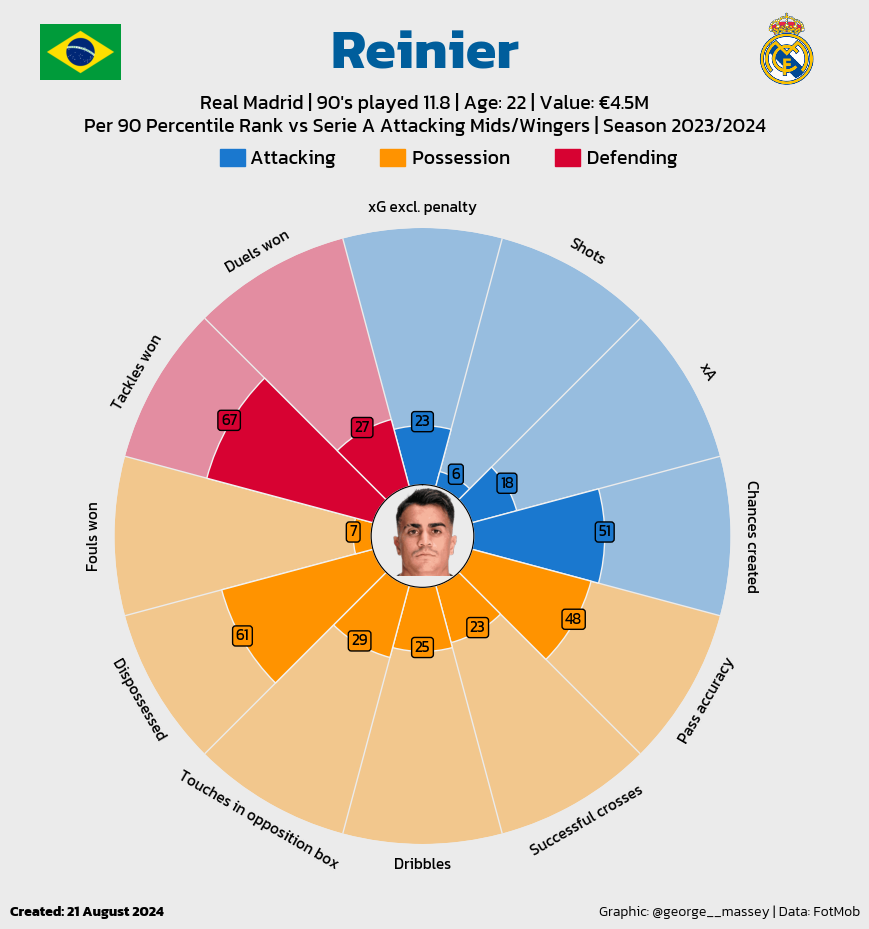

In [105]:
# color for the slices and text
slice_colors = ["#1A78CF"] * 4 + ["#FF9300"] * 6 + ["#D70232"] * 2
text_colors = ["#000000"] * 12 + ["#F2F2F2"] * 0

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBEB",     # background color
    straight_line_color="#EBEBEB",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(10, 8),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="black", fontsize=11,
        fontproperties=regular, va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="black", fontsize=11,
        fontproperties=regular,
        zorder=3,
        bbox=dict(
            edgecolor="black", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 1.08, f"{player}", size=40,
    ha="center", color="#005E9C", weight = 'bold',
    fontproperties=bold
)

# add subtitle
fig.text(
    0.515, 1,
    f"{team} | 90's played {round(minutes_played/90, 1)} | Age: {age} | Value: {market_value}\nPer 90 Percentile Rank vs {league} {position} | Season {season}",
    size=14,
    ha="center", color="black",
    fontproperties=regular

)

# add credits
CREDIT_1 = "Graphic: @george__massey | Data: FotMob"

fig.text(
    0.95, 0.02, f"{CREDIT_1}", size=10,
    color="black",
    ha="right",
    fontproperties=light
)

fig.text(
    0.1, 0.02, f"Created: {todays_date}", size=10,
    color="black",
    ha="left",
    fontproperties=bold
)

# add text
fig.text(
    0.34, 0.96, "Attacking                 Possession                 Defending", size=14,
    color="black", fontproperties=regular
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.31, 0.9575), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.47, 0.9575), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.645, 0.9575), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
])

img_offset = OffsetImage(team_logo, zoom=0.28)
img_box = AnnotationBbox(img_offset, (1.15,1.35), xycoords='axes fraction', box_alignment=(1.0, 1.0), boxcoords="offset pixels", frameon=False, pad=0.1)
ax = plt.gca()
ax.add_artist(img_box)
img_box.patch.set_alpha(0)

# add image
ax_image = add_image(
    player_image, fig, left=0.4578, bottom=0.445, width=0.11, height=0.11
)   # these values might differ when you are plotting

ax2 = fig.add_axes([.13,1.04,.08,.12])
ax2.axis('off')
img = Image.open(country_image)
ax2.imshow(img)

fig.savefig(
    f"C:/Users/George/Documents/Football Analytics/Visuals/{player} {team}.png",
    facecolor=ax.get_facecolor(),
    dpi=600,
    bbox_inches="tight"
)

plt.show()